<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Deskriptive_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np

In [2]:
# Repository von github klonen, damit die Daten verfügbar sind
! git clone https://github.com/AlexKressner/Statistik

Cloning into 'Statistik'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 57 (delta 22), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (57/57), 627.92 KiB | 3.92 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [3]:
pd.options.display.max_columns = 100

In [4]:
! ls Statistik

Deskriptive_Statistik.ipynb  Statistisches_Testen.ipynb
house_price.csv		     Wahrscheinlichkeitsrechnung.ipynb


# Kaggle Competition **House Price Prediction**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Kennzahlen für diskrete Merkmale

In [5]:
# Daten laden
data = pd.read_csv("./Statistik/house_price.csv")

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data.YrSold

,YrSold
0,2008
1,2007
2,2008
3,2006
4,2008
...,...
1455,2007
1456,2010
1457,2010
1458,2010


In [8]:
data.YrSold = data.YrSold.astype("object")

**AUFGABE:** Bitte berechnen Sie die absolute Häufigkeit des Merkmals "YrSold"! Nutzen Sie dafür die `pandas` Funktion `value_counts()`!

In [9]:
data.YrSold.value_counts().sort_index()

,count
YrSold,
2006,314
2007,329
2008,304
2009,338
2010,175


**AUFGABE:** Bitte stellen Sie die absoluten Häufigkeite in einem Säulendiagramm dar! Nutzen Sie dafür die Funktion `plot()`.



<Axes: xlabel='YrSold'>

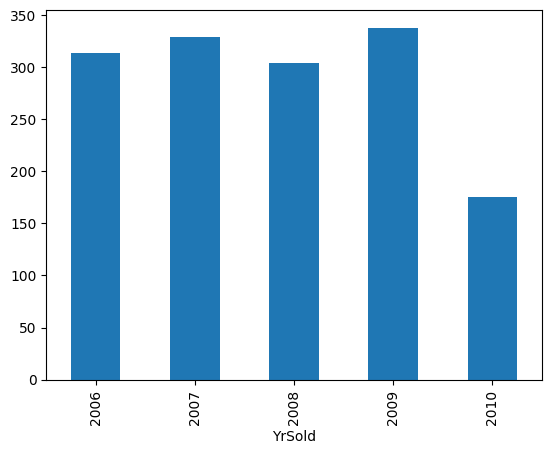

In [10]:
data.YrSold.value_counts().sort_index().plot(kind="bar")

**AUFGABE:** Bitte berechnen Sie die relativen Häufigkeit des Merkmals "YrSold"! Passen Sie dafür die Parameter der Funktion zur Berechnung der absoluten Häufigkeit an!

In [11]:
data.YrSold.value_counts(normalize=True).sort_index()

,proportion
YrSold,
2006,0.215068
2007,0.225342
2008,0.208219
2009,0.231507
2010,0.119863


**AUFGABE:** Bitte stellen Sie die relativen Häufigkeite in einem Kuchendiagramm dar!

<Axes: ylabel='proportion'>

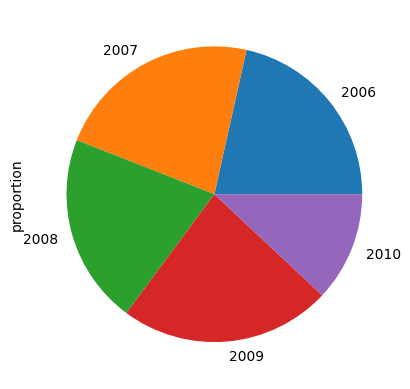

In [12]:
data.YrSold.value_counts(normalize=True).sort_index().plot(kind="pie")

**Aufgabe:** Bitte berechnen Sie die empirische Verteilungsfunktion für das Merkmal "YrSold".

In [13]:
data.YrSold.value_counts(normalize=True).sort_index().cumsum()

,proportion
YrSold,
2006,0.215068
2007,0.440411
2008,0.648630
2009,0.880137
2010,1.000000


## 2. Kennzahlen für stetige Merkmale

**AUFGABE:** Bitte berechnen Sie das arithmetische Mittel für den Verkaufspreis, d.h. die Spalte `SalePrice`!

In [15]:
data.SalePrice.mean()

180921.19589041095

**AUFGABE:** Bitte berechnen Sie den Median für den Verkaufspreis, d.h. die Spalte `SalePrice`!

In [16]:
data.SalePrice.median()

163000.0

**AUFGABE:** Bitte berechnen Sie den Modus für den Verkaufspreis, d.h. die Spalte `SalePrice`!

In [17]:
data.SalePrice.mode()

,SalePrice
0,140000


**AUFGABE:** Erstellen Sie ein Histogramm für das Merkmal `SalePrice`! Nutzen Sie dafür die Funktion `plot`. Wie viele Klassen werden gebildet? Bitte verändern Sie die Einstellungen, damit 20 äquidistante Klassen gebildet werden!

<Axes: ylabel='Frequency'>

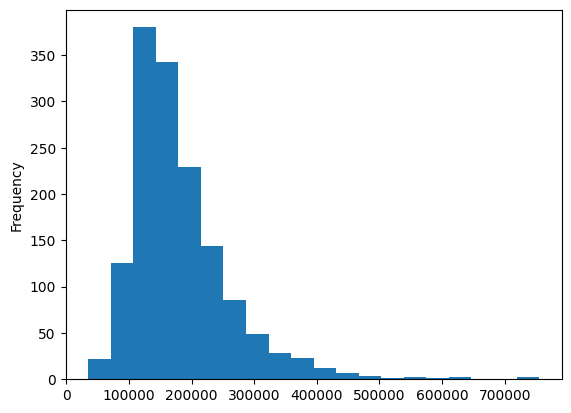

In [20]:
data.SalePrice.plot(kind="hist", bins=20)

**AUFGABE:** Erstellen Sie eine Abbildung, die die empirische Verteilungsfunktion für das Merkmal `SalePrice` zeigt!

<Axes: xlabel='SalePrice'>

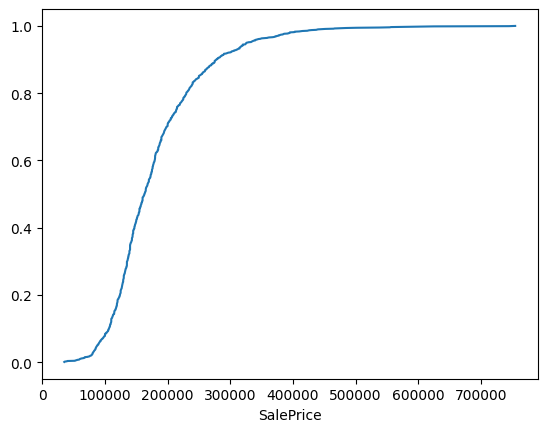

In [24]:
data.SalePrice.value_counts(normalize=True).sort_index().cumsum().plot()

**AUFGABE:** Bitte berechnen Sie die Standardabweichung, Varianz und den Variationskoeffizienten für das Merkmal `SalePrice`!

In [25]:
data.SalePrice.std(), data.SalePrice.var(), data.SalePrice.std()/data.SalePrice.mean()

(79442.50288288662, 6311111264.297448, 0.4391000318780071)

**Varianzverschiebungssatz**

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i)^2 - \bar{x}^2$

In [26]:
N = len(data)
X_mean = data.SalePrice.mean()

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i - \bar{x})^2$

In [28]:
data.SalePrice.apply(lambda x: (x-X_mean)**2).sum()/N

6306788585.349299

$s^2= \frac{1}{N} \sum_{i=1}^{N} (x_i)^2 - \bar{x}^2$

In [29]:
data.SalePrice.apply(lambda x: x**2).sum()/N - X_mean**2

6306788585.349304

## 3. Kontingenz- und Korrelationsanalyse

**AUFGABE:** Bitte erstellen Sie eine Kreuztabelle für die Merkmale `Fireplaces` und `TotRmsAbvGrd`! Die Kreuztabelle soll die absoluten Häufigkeiten wiederspiegeln.

In [32]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14
Fireplaces,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1
1,0,5,15,77,158,187,115,53,27,9,4,0
2,0,0,5,14,26,29,13,9,10,6,3,0
3,0,0,0,0,0,2,1,1,0,0,1,0


**AUFGABE:** Bitte ergänzen Sie jeweils die Randhäufigkeiten zur Kreuztabelle.

In [33]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1,690
1,0,5,15,77,158,187,115,53,27,9,4,0,650
2,0,0,5,14,26,29,13,9,10,6,3,0,115
3,0,0,0,0,0,2,1,1,0,0,1,0,5
All,1,17,97,275,402,329,187,75,47,18,11,1,1460


**AUFGABE:** Bitte stellen Sie nun die relativen Häufigkeiten in der Kreuztabelle dar.

In [35]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True, normalize=True).round(2)*100

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,0.0,1.0,5.0,13.0,15.0,8.0,4.0,1.0,1.0,0.0,0.0,0.0,47.0
1,0.0,0.0,1.0,5.0,11.0,13.0,8.0,4.0,2.0,1.0,0.0,0.0,45.0
2,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All,0.0,1.0,7.0,19.0,28.0,23.0,13.0,5.0,3.0,1.0,1.0,0.0,100.0


**AUFGABE:** Bitte erstellen Sie eine Pivottabelle, die für jede Kombination von Verkaufsjahr (`YrSold`) und Qualitätsindex einer Immobilie (`OverallQual`) den mittleren Verkaufspreis (`SalePrice`) wiedergibt.

In [39]:
pd.pivot_table(data, index="YrSold", columns="OverallQual", values="SalePrice", aggfunc="mean")

OverallQual,1,2,3,4,5,6,7,8,9,10
YrSold,,,,,,,,,,
2006,NaN,35311.0,100635.000000,107020.454545,137708.816092,157273.500000,204652.894737,272497.500000,382375.333333,500945.000000
2007,39300.0,NaN,99500.000000,110537.346154,132541.631579,169316.402597,208039.585714,284164.543478,336012.250000,537812.500000
2008,NaN,NaN,68125.000000,116863.833333,132353.086420,163603.092784,204239.750000,272456.787879,344298.142857,324000.000000
2009,61000.0,60000.0,88733.333333,104853.125000,132107.147727,159910.901235,205766.152778,267885.594595,371588.307692,407260.166667
2010,NaN,NaN,80800.000000,104973.666667,132404.739130,154258.888889,221356.097561,273203.125000,405474.833333,NaN


**AUFGABE:** Erstellen Sie einen Scatterplot für die Merkmale `SalePrice` und `GrLivArea`.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

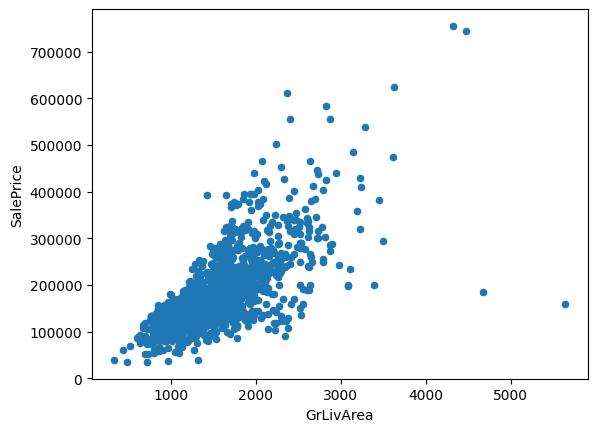

In [40]:
data.plot(kind="scatter", x="GrLivArea", y="SalePrice")

**AUFGABE:** Berechnen Sie den Pearson-Bravais Korrelationskoeffizienten für die Merkmale `SalePrice` und `GrLivArea`.

## 4. Regressionsanalyse

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

**AUFGABE:** Bitte bestimmen Sie die Regressionsgerade, die den statistischen Zusammenhang zwischen `SalePrice` und `GrLivArea` bestmöglich beschreibt. Was sind die Parameter ($\hat{a}, \hat{b}$) der Regressionsgeraden?

In [48]:
model = LinearRegression()
X = data.GrLivArea.values.reshape(-1,1)
y = data.SalePrice.values
model.fit(X,y)

LinearRegression()

In [49]:
model.intercept_, model.coef_

(18569.02585648722, array([107.13035897]))

In [51]:
X

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]])

In [52]:
y_pred = model.predict(X)

**AUFGABE:** Bitte bestimmen Sie den mittleren absoluten Fehler, den mittleren absoluten prozentualen Fehler sowie das Bestimmtheitsmaß?

In [53]:
mean_absolute_error(y, y_pred), mean_absolute_percentage_error(y, y_pred), r2_score(y, y_pred)

(37638.72898759625, 0.22552425216893301, 0.5021486502718042)

**AUFGABE:** Bitte erstellen Sie einen Scatter Plot für die Merkmale `GrLivArea` und `SalePrice`, in dem die zuvor berechnete Regressionsgerade eingezeichnet ist?

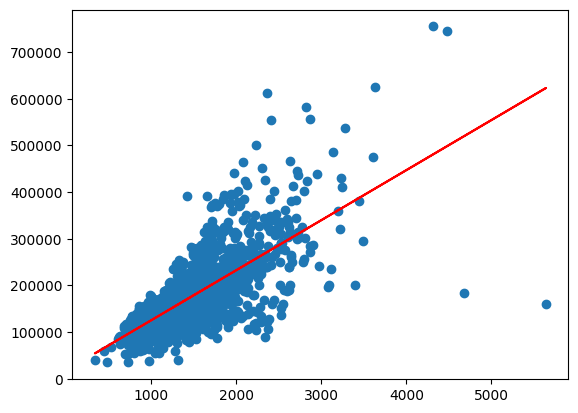

In [54]:
  plt.scatter(X, y)
  plt.plot(X, y_pred, color="red")